In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [14, 14]
np.random.seed(42)

# Importamos los datos

In [2]:
vehiculos = pd.read_csv("./data/vehiculos_procesado_con_grupos.csv").drop(
            ["fabricante", "modelo", "transmision", "traccion", "clase", "combustible", "consumo"], 
    axis=1)

In [3]:
vehiculos.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


In [4]:
datos_numericos = vehiculos.select_dtypes([int, float])
datos_categoricos = vehiculos.select_dtypes([object, "category"])

In [5]:
for col in datos_numericos.columns:
    datos_numericos[col].fillna(datos_numericos[col].mean(), inplace=True)

C:\Users\mario\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Un aspecto importante a tener en cuenta cuando usamos Kmedias es que las distancias dependen de las escalas de las variables. Por lo tanto, es conveniente normalizar datos antes de continuar

In [6]:
from sklearn.preprocessing import MinMaxScaler

datos_numericos_normalizado = MinMaxScaler().fit_transform(datos_numericos)
datos_numericos_normalizado = pd.DataFrame(datos_numericos_normalizado,
                                               columns=datos_numericos.columns) 

In [7]:
datos_categoricos_codificados = pd.get_dummies(datos_categoricos, drop_first=True)

In [8]:
vehiculos_procesado = pd.concat([datos_numericos_normalizado, datos_categoricos_codificados], axis=1)

In [9]:
vehiculos_procesado.shape

(36791, 28)

In [10]:
vehiculos_procesado.head()

,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,...,tamano_motor_tipo_muy pequeño,tamano_motor_tipo_pequeño,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.410256,0.285714,0.424351,0.360294,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# K-Medias

Scikit-learn implementa KMedias en el módulo [sklearn.cluster.KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [11]:
from sklearn.cluster import KMeans

In [12]:
estimador_kmedias = KMeans(random_state=42, n_clusters=8)

estimador_kmedias.fit(vehiculos_procesado)

KMeans(random_state=42)

Dado que es aprendizaje no supervisado, nos interesan las clases (los clusters) de los datos de entrenamiento.

In [13]:
clusters = estimador_kmedias.labels_
clusters

array([2, 7, 2, ..., 6, 6, 6])

No obstante, como cualquier estimador, podemos usarlo para asignar clusters a nuevos elementos.

In [14]:
estimador_kmedias.predict(vehiculos_procesado)

array([2, 7, 2, ..., 6, 6, 6])

In [15]:
centroides = estimador_kmedias.cluster_centers_
centroides

array([[ 2.95606009e-01,  2.50104888e-01,  3.19368280e-01,
         2.43528472e-01,  6.16740088e-02,  3.08370044e-02,
         1.25550661e-01,  7.15859031e-01,  6.42437592e-02,
         5.55111512e-17,  1.46842878e-03,  7.30543319e-01,
         3.94273128e-01,  1.11022302e-16,  4.40528634e-02,
         9.55580029e-01,  4.20704846e-01,  4.03817915e-03,
         2.08883994e-01,  1.79882526e-01,  8.35535977e-01,
         8.88178420e-16, -5.82867088e-16,  3.30396476e-02,
         8.37738620e-01,  2.93685756e-02, -4.16333634e-16,
         1.46842878e-03],
       [ 3.31044945e-01,  2.56781340e-01,  3.54587735e-01,
         2.82779695e-01,  8.25993020e-02,  9.02443078e-02,
         1.33122819e-01,  1.86139272e-01,  1.72677414e-01,
         6.68107030e-02,  8.89147416e-02,  7.80621572e-01,
         2.53448562e-01,  9.52966595e-01,  4.70334054e-02,
        -8.88178420e-16,  4.40585009e-01,  5.83347183e-02,
         4.91939505e-02,  2.19710819e-01,  8.47598471e-03,
         9.91191624e-01, -1.08

In [16]:
centroides.shape

(8, 28)

Podemos ver también la inercia final de los clusters

In [17]:
estimador_kmedias.inertia_

63425.12768804004

In [18]:
print(KMeans.__doc__)

K-Means clustering.

    Read more in the :ref:`User Guide <k_means>`.

    Parameters
    ----------

    n_clusters : int, default=8
        The number of clusters to form as well as the number of
        centroids to generate.

    init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
        Method for initialization:

        'k-means++' : selects initial cluster centers for k-mean
        clustering in a smart way to speed up convergence. See section
        Notes in k_init for more details.

        'random': choose `n_clusters` observations (rows) at random from data
        for the initial centroids.

        If an ndarray is passed, it should be of shape (n_clusters, n_features)
        and gives the initial centers.

        If a callable is passed, it should take arguments X, n_clusters and a
        random state and return an initialization.

    n_init : int, default=10
        Number of time the k-means algorithm will be run with different
        centro

Los hiperparámetros más importantes del algoritmo `KMeans`:

- **n_clusters**: El número de clusters a crear, o sea **K**. Por defecto es 8
- **init**: Método de inicialización. Un problema que tiene el algoritmo K-Medias es que la solucción alcanzada varia según la inicialización de los centroides. `sklearn` empieza usando el método `kmeans++` que es una versión más moderna y que proporciona mejores resultados que la inicialización aleatoria (random)
- **n_init**: El número de inicializaciones a probar. Básicamente `KMeans` aplica el algoritmo `n_init` veces y elige los clusters que minimizan la inercia.
- **max_iter**: Máximo número de iteraciones para llegar al criterio de parada.
- **tol**: Tolerancia para declarar criterio de parada (cuanto más grande, antes parará el algoritmo).



In [19]:
from sklearn.metrics import euclidean_distances

In [20]:
distancias_centroides = euclidean_distances(centroides)
distancias_centroides

array([[0.        , 2.34467096, 1.84615744, 2.04281789, 1.83269805,
        1.49117542, 2.24705973, 2.58647712],
       [2.34467096, 0.        , 1.43146002, 2.39491102, 1.44433372,
        2.04701341, 2.25125555, 2.18081695],
       [1.84615744, 1.43146002, 0.        , 1.71582578, 1.90123093,
        1.57901609, 1.83353605, 1.54884288],
       [2.04281789, 2.39491102, 1.71582578, 0.        , 2.06582596,
        2.47842739, 2.5003794 , 1.36183152],
       [1.83269805, 1.44433372, 1.90123093, 2.06582596, 0.        ,
        2.47539787, 2.45297591, 2.61546208],
       [1.49117542, 2.04701341, 1.57901609, 2.47842739, 2.47539787,
        0.        , 2.09649078, 2.27194894],
       [2.24705973, 2.25125555, 1.83353605, 2.5003794 , 2.45297591,
        2.09649078, 0.        , 2.47044037],
       [2.58647712, 2.18081695, 1.54884288, 1.36183152, 2.61546208,
        2.27194894, 2.47044037, 0.        ]])

In [21]:
list(zip(np.argmax(distancias_centroides, axis=1), np.max(distancias_centroides, axis=1)))

[(7, 2.5864771221801144),
 (3, 2.3949110165243366),
 (4, 1.9012309306731983),
 (6, 2.5003794027090707),
 (7, 2.615462081783392),
 (3, 2.4784273917057953),
 (3, 2.5003794027090707),
 (4, 2.615462081783392)]

In [22]:
def resumen_cluster(cluster_id):
    cluster = vehiculos[clusters==cluster_id]
    resumen_cluster = cluster[datos_categoricos.columns].mode().to_dict(orient="records")[0]
    resumen_cluster.update(cluster.mean().to_dict())
    resumen_cluster["cluster_id"] = cluster_id
    return resumen_cluster

def comparar_clusters(*cluster_ids):
    resumenes = []
    for cluster_id in cluster_ids:
        resumenes.append(resumen_cluster(cluster_id))
    return pd.DataFrame(resumenes).set_index("cluster_id").T

In [23]:
resumen_cluster(0)

{'clase_tipo': 'Coches pequeños',
 'traccion_tipo': 'dos',
 'transmision_tipo': 'Automatica',
 'combustible_tipo': 'Premium',
 'tamano_motor_tipo': 'mediano',
 'consumo_tipo': 'bajo',
 'co2_tipo': 'bajo',
 'year': 2006.9654919236416,
 'desplazamiento': 2.9057268722466962,
 'cilindros': 5.501468428781204,
 'co2': 425.1991631631398,
 'consumo_litros_milla': 0.18106522347095352,
 'cluster_id': 0}

In [24]:
comparar_clusters(0,5)

cluster_id,0,5
clase_tipo,Coches pequeños,Coches pequeños
traccion_tipo,dos,dos
transmision_tipo,Automatica,Automatica
combustible_tipo,Premium,Normal
tamano_motor_tipo,mediano,pequeño
consumo_tipo,bajo,bajo
co2_tipo,bajo,bajo
year,2006.97,1999.52
desplazamiento,2.90573,2.46001
cilindros,5.50147,4.49383


In [25]:
comparar_clusters(*np.unique(clusters))

cluster_id,0,1,2,3,4,5,6,7
clase_tipo,Coches pequeños,Coches pequeños,Camionetas,Coches pequeños,Coches pequeños,Coches pequeños,Coches pequeños,Camionetas
traccion_tipo,dos,dos,dos,dos,dos,dos,dos,dos
transmision_tipo,Automatica,Automatica,Automatica,Automatica,Automatica,Automatica,Automatica,Automatica
combustible_tipo,Premium,Normal,Normal,Premium,Premium,Normal,Normal,Normal
tamano_motor_tipo,mediano,mediano,grande,muy grande,mediano,pequeño,muy pequeño,muy grande
consumo_tipo,bajo,moderado,alto,muy alto,moderado,bajo,muy bajo,muy alto
co2_tipo,bajo,moderado,alto,muy alto,moderado,bajo,muy bajo,muy alto
year,2006.97,1997.91,1999.38,2004.41,2003.76,1999.52,2003.31,1994.65
desplazamiento,2.90573,3.18218,3.99969,5.469,3.42051,2.46001,1.91587,4.87761
cilindros,5.50147,5.59485,6.34473,8.74311,6.19307,4.49383,4.03347,7.37317


Una parte del framework que me gusta utilizar en la fase de Análisis Exploratorio de Datos [(link al notebook)](https://github.com/manugarri/curso_data_science/tree/master/Secciones/Seccion2.Analisis_y_procesado_de_datos/Analisis_Exploratorio_de_Datos), es incluir un clustering para indicar posibles grupos naturales en el dataset. Ésto por supuesto está también indicado en el artículo original que explica este framework ([link en inglés](http://blog.districtdatalabs.com/data-exploration-with-python-2))

In [26]:
def kmeans_cluster(df, n_clusters=2):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

def resumen_grafico_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    cluster_summary = cluster_summary.drop(["Count"], axis=1).set_index("Cluster")
    return cluster_summary[sorted(cluster_summary.columns)]

In [27]:
cluster_results = kmeans_cluster(vehiculos_procesado, 8)
cluster_summary = resumen_grafico_clustering(cluster_results)

In [28]:
cluster_summary

,cilindros,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,co2,co2_tipo_bajo,...,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,desplazamiento,tamano_motor_tipo_mediano,tamano_motor_tipo_muy grande,tamano_motor_tipo_muy pequeño,tamano_motor_tipo_pequeño,traccion_tipo_dos,transmision_tipo_Manual
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.250105,0.061674,0.030837,0.125551,0.715859,0.064244,0.000000,0.001468,0.319368,0.837739,...,0.000000,0.000000,0.033040,0.295606,0.420705,0.004038,0.208884,0.179883,0.730543,0.394273
1,0.256777,0.082613,0.090259,0.132979,0.186170,0.172706,0.066822,0.088930,0.354582,0.000000,...,0.991190,0.000000,0.000332,0.331049,0.440492,0.058344,0.049202,0.219747,0.780585,0.253491
2,0.310338,0.025701,0.040321,0.053289,0.035369,0.275878,0.097854,0.125206,0.403210,0.018156,...,0.047159,0.000707,0.030653,0.435858,0.254893,0.200424,0.007310,0.058713,0.570856,0.261731
3,0.481651,0.008847,0.083021,0.088465,0.352161,0.190201,0.086424,0.038448,0.493326,0.000000,...,0.022116,0.751956,0.000000,0.624231,0.047295,0.803675,0.000000,0.002382,0.621300,0.176931
4,0.299505,0.084981,0.087548,0.192041,0.556868,0.072657,0.000770,0.003594,0.354669,0.000000,...,0.988960,0.000000,0.000257,0.361604,0.390501,0.105006,0.050834,0.163030,0.672401,0.272144
5,0.178149,0.103839,0.049731,0.153969,0.354884,0.177442,0.010941,0.061269,0.304121,0.994032,...,0.000000,0.000000,0.012532,0.238485,0.157748,0.010145,0.314502,0.454744,0.800080,0.350507
6,0.145265,0.118022,0.017615,0.139431,0.630759,0.076829,0.001626,0.007724,0.241130,0.003252,...,0.000136,0.000000,0.998374,0.168726,0.026965,0.000000,0.754201,0.218293,0.910569,0.486856
7,0.383798,0.001970,0.016196,0.017947,0.031517,0.132195,0.234187,0.142701,0.507803,0.000000,...,0.000000,0.999562,0.000000,0.548412,0.079448,0.649595,0.000875,0.011600,0.563362,0.264828


In [29]:
matplotlib.rcParams['figure.figsize'] = [14, 14]

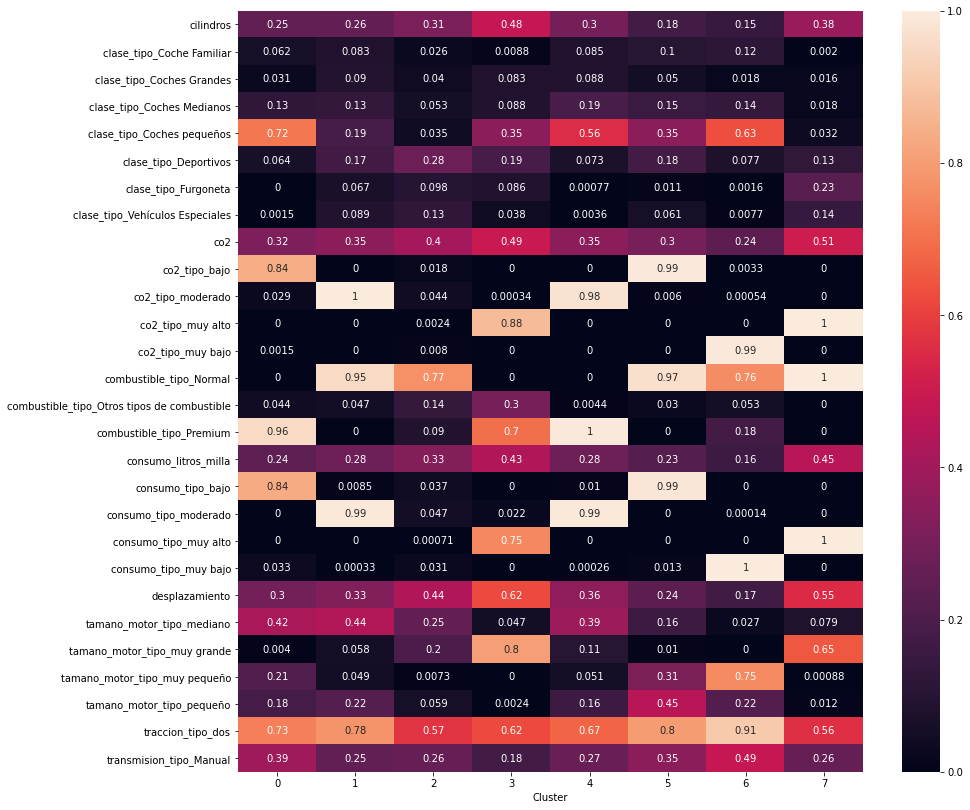

In [30]:
import seaborn as sns
sns.heatmap(cluster_summary.transpose(), annot=True);

#### MiniBatchKMeans

`scikit-learn` tiene una implementación distinta del algoritmo K-medias, llamada `MiniBatchKMeans`. Esta implementación procesa el dataset por bloques, y permite hacer análisis de clusters con datasets que no cabrían en memoria completamente. Funciona de forma más rapida que `KMeans` con el coste de potencialmente producir clusters con una inercia mayor.

La api es la misma, simplemente toma un parámetro adicional `batch_size` que indica cuantos elementos tomar en cada bloque.

In [31]:
from sklearn.cluster import MiniBatchKMeans

In [32]:
%%timeit -n 1
estimador_kmedias = KMeans(random_state=42, n_clusters=8).fit(vehiculos_procesado)

863 ms ± 14.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
estimador_kmedias.inertia_

63425.12768804004

In [34]:
%%timeit -n 1
estimador_kmedias_minibatch = MiniBatchKMeans(random_state=42, n_clusters=8).fit(
    vehiculos_procesado)

82.9 ms ± 9.52 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# ¿Cómo elegir K?

Hay varias opciones para elegir K

**1.Conocimiento de dominio**
A veces es posible tomar una decisión razonable a priori respecto al número de clusters que queremos. Por ejemplo, supongamos que queremos agrupar un conjunto de películas. Un valor razonable de K sería el número de categorías de películas en IMDB.

**2. Decisión de negocio**
Hay veces que la decisión del número de clusters viene dada por el negocio. Por ejemplo, supongamos que estamos agrupando un conjunto de invitados a un banquete. En ese caso el valor de K vendría dado por el número disponible de mesas.

**3.Método del codo ([elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)))**
El método del codo usa como métrica el porcentaje de la varianza explicado como factor respecto al número de clusters. Se intenta buscar aquel número de clusters donde el añadir un cluster más no aumente demasiado dicho porcentaje (es decir, el "codo" de la gráfica que representa esto implica llegar al punto de ganancias decrecientes, donde añadir un cluster nuevo no reduce la varianza de forma significativa.
El porcentaje de la varianza se representa como la variance entre grupos dividida de la varianza total

In [36]:
from scipy.spatial.distance import cdist

In [37]:
print(cdist.__doc__)


    Compute distance between each pair of the two collections of inputs.

    See Notes for common calling conventions.

    Parameters
    ----------
    XA : ndarray
        An :math:`m_A` by :math:`n` array of :math:`m_A`
        original observations in an :math:`n`-dimensional space.
        Inputs are converted to float type.
    XB : ndarray
        An :math:`m_B` by :math:`n` array of :math:`m_B`
        original observations in an :math:`n`-dimensional space.
        Inputs are converted to float type.
    metric : str or callable, optional
        The distance metric to use.  If a string, the distance function can be
        'braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation',
        'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon',
        'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto',
        'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean',
        'wminkowski', 'yule'.
    *args : tuple. 

In [38]:
varianza_total = cdist(XA=vehiculos_procesado, XB=np.array([vehiculos_procesado.mean()]))

In [39]:
suma_varianza_total = varianza_total.sum()

In [40]:
suma_varianza_total

69828.68953271549

Ahora creamos funciones para calcular varianza intra cluster (wss) y la medida de varianza explicada (definida como la reduccion de la varianza en porcentaje respecto a la varianza máxima (que sería la varianza para k=1).

In [41]:
def varianza_cluster(cluster_id, centroide_cluster, etiquetas_clusters):
    elementos_cluster = vehiculos_procesado[etiquetas_clusters==cluster_id]
    return cdist(XA=elementos_cluster, XB=np.array([centroide_cluster])).sum()

def medida_varianza(estimador_kmedias, suma_varianza_total):
    etiquetas_clusters = estimador_kmedias.labels_
    wss = 0
    for i, cluster_id in enumerate(np.unique(etiquetas_clusters)):
        centroide_cluster = estimador_kmedias.cluster_centers_[i]
        wss += varianza_cluster(cluster_id, centroide_cluster, etiquetas_clusters)
    return (suma_varianza_total-wss) / suma_varianza_total

Creamos ahora otra medida de evaluación que simplemente usa la inercia

In [42]:
def medida_inercia(estimador_kmedias):
    return estimador_kmedias.inertia_

Ahora creamos una funcion que evalue para un valor de k las dos métricas

In [43]:
def evaluar_k_kmedias(k, medida, **kwargs):
    if medida=="inercia":
        funcion_medida = medida_inercia
    elif medida=="varianza":
        funcion_medida = medida_varianza
        
    estimador_kmedias = KMeans(random_state=42, n_clusters=k)
    estimador_kmedias.fit(vehiculos_procesado)
    return funcion_medida(estimador_kmedias, **kwargs)

In [44]:
resultados_k = {}
rango_k = [5, 10, 20, 30, 50, 75, 100, 200, 300]
for k in rango_k:
    resultados_k[k] = evaluar_k_kmedias(k, 
                                "inercia"), evaluar_k_kmedias(k, "varianza", 
                                                              suma_varianza_total=suma_varianza_total)

In [45]:
resultados_k

{5: (74478.33878951326, 0.26774255326150237),
 10: (58636.31591061436, 0.35783662594862353),
 20: (44896.484779991646, 0.4449131671452155),
 30: (39030.96124348189, 0.4879544380117436),
 50: (30702.097659716652, 0.5641121982088915),
 75: (23969.17122487131, 0.6297561383074125),
 100: (19646.01428023442, 0.681267726473684),
 200: (10458.114052028495, 0.7941735248820989),
 300: (6333.303579197598, 0.8596545240838667)}

Ahora hacemos una gráfica para ver donde está el "codo" de forma aproximada.

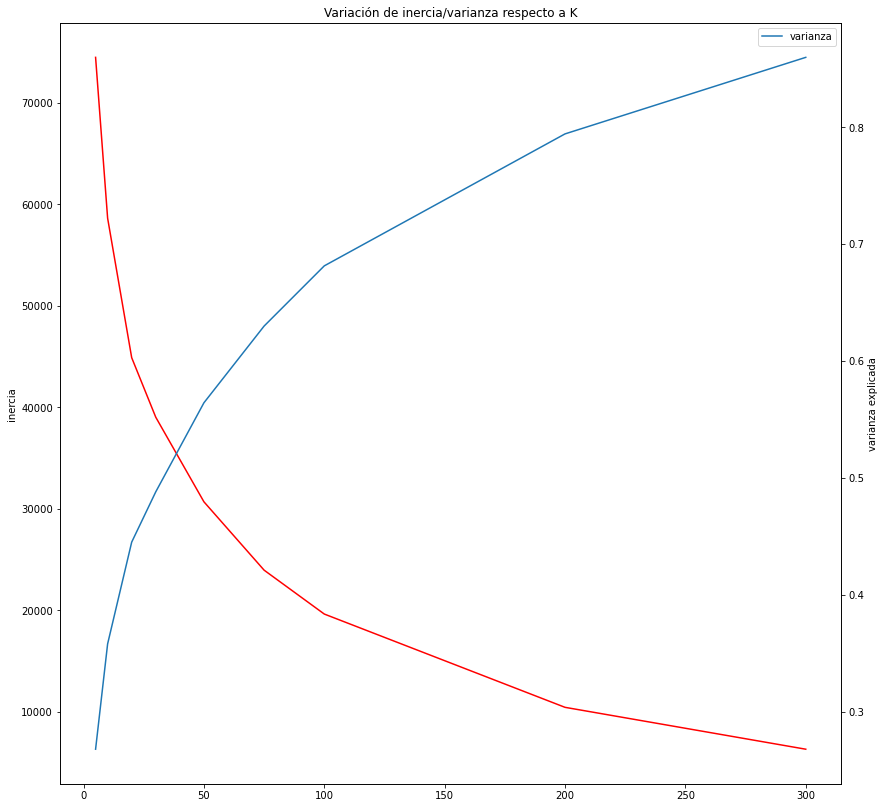

In [46]:
fig, ax1 = plt.subplots()

ax1.plot(
    [c[0] for c in resultados_k.items()],
    [c[1][0] for c in resultados_k.items()], label="inercia", color="red")
ax1.set_ylabel('inercia')

ax2 = ax1.twinx()
ax2.plot(
    [c[0] for c in resultados_k.items()],
    [c[1][1] for c in resultados_k.items()], label="varianza")
ax2.set_ylabel('varianza explicada')

plt.xlabel("K")
plt.legend()
plt.title("Variación de inercia/varianza respecto a K");

Para este caso en concreto, un valor de K=100 o 150, podria ser una buena opción si no hubiese ningún otro requisito.